In [207]:
# importando as bilbiotecas
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt

# importando a biblioteca scikit-learn dataset
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression  
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.metrics import classification_report

In [208]:
# Importa a base de dados
df = pd.read_excel('/content/output.xlsx')
df

,Unnamed: 0,Spool Diam,P5 - Force Generated by Wind [N],P47 - Product Mass,P63 - accheave,P64 - accroll,P65 - accpitch,P66 - Spoolingf,Resultado
0,1,1200,143759.923226,200,0.9807,0.9807,0.9807,635092,1
1,2,1200,143759.923226,200,0.9807,1.9614,1.9614,635092,1
2,3,1200,143759.923226,200,0.9807,2.9421,2.9421,635092,1
3,4,1200,143759.923226,200,0.9807,3.9228,3.9228,635092,1
4,5,1200,143759.923226,200,0.9807,4.9035,4.9035,635092,1
...,...,...,...,...,...,...,...,...,...
638,644,1200,143759.923226,250,17.6526,4.9035,4.9035,595773,0
639,645,1200,143759.923226,250,17.6526,5.8842,5.8842,595773,0
640,646,1200,143759.923226,250,17.6526,6.8649,6.8649,595773,0
641,647,1200,143759.923226,250,17.6526,7.8456,7.8456,595773,0


In [209]:
# O = falha  e 1 = sucesso
df['Resultado'].value_counts()

1    506
0    137
Name: Resultado, dtype: int64

In [210]:
# Separando as variáveis dos resultados
X = df.drop(columns = "Resultado")
y = df['Resultado']


In [211]:
X

,Unnamed: 0,Spool Diam,P5 - Force Generated by Wind [N],P47 - Product Mass,P63 - accheave,P64 - accroll,P65 - accpitch,P66 - Spoolingf
0,1,1200,143759.923226,200,0.9807,0.9807,0.9807,635092
1,2,1200,143759.923226,200,0.9807,1.9614,1.9614,635092
2,3,1200,143759.923226,200,0.9807,2.9421,2.9421,635092
3,4,1200,143759.923226,200,0.9807,3.9228,3.9228,635092
4,5,1200,143759.923226,200,0.9807,4.9035,4.9035,635092
...,...,...,...,...,...,...,...,...
638,644,1200,143759.923226,250,17.6526,4.9035,4.9035,595773
639,645,1200,143759.923226,250,17.6526,5.8842,5.8842,595773
640,646,1200,143759.923226,250,17.6526,6.8649,6.8649,595773
641,647,1200,143759.923226,250,17.6526,7.8456,7.8456,595773


In [212]:
y

0      1
1      1
2      1
3      1
4      1
      ..
638    0
639    0
640    0
641    0
642    0
Name: Resultado, Length: 643, dtype: int64

In [213]:
#  Divide a base de dados em teste e treino, sendo 'test_size = 0.3' = 30% dos dados para teste e 70% para treino.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =21) 

In [214]:
# Conjunto de treino com 450 linhas
X_train

,Unnamed: 0,Spool Diam,P5 - Force Generated by Wind [N],P47 - Product Mass,P63 - accheave,P64 - accroll,P65 - accpitch,P66 - Spoolingf
541,545,1200,143759.923226,250,6.8649,4.9035,4.9035,595773
168,171,1200,143759.923226,150,0.9807,8.8263,8.8263,157325
311,314,1200,143759.923226,150,16.6719,7.8456,7.8456,157325
364,367,1200,143759.923226,100,4.9035,6.8649,6.8649,157325
6,7,1200,143759.923226,200,0.9807,6.8649,6.8649,635092
...,...,...,...,...,...,...,...,...
419,422,1200,143759.923226,100,10.7877,7.8456,7.8456,157325
120,122,1200,143759.923226,200,13.7298,4.9035,4.9035,635092
368,371,1200,143759.923226,100,5.8842,1.9614,1.9614,157325
48,49,1200,143759.923226,200,5.8842,3.9228,3.9228,635092


In [215]:
# Conjunto de teste com 193 linhas
X_test

,Unnamed: 0,Spool Diam,P5 - Force Generated by Wind [N],P47 - Product Mass,P63 - accheave,P64 - accroll,P65 - accpitch,P66 - Spoolingf
386,389,1200,143759.923226,100,7.8456,1.9614,1.9614,157325
71,73,1200,143759.923226,200,8.8263,0.9807,0.9807,635092
442,445,1200,143759.923226,100,13.7298,3.9228,3.9228,157325
499,503,1200,143759.923226,250,1.9614,7.8456,7.8456,595773
612,618,1200,143759.923226,250,14.7105,5.8842,5.8842,595773
...,...,...,...,...,...,...,...,...
519,523,1200,143759.923226,250,4.9035,0.9807,0.9807,595773
232,235,1200,143759.923226,150,8.8263,0.9807,0.9807,157325
401,404,1200,143759.923226,100,8.8263,7.8456,7.8456,157325
427,430,1200,143759.923226,100,11.7684,6.8649,6.8649,157325


In [216]:
#A base de dados possui valores de grandezas muito diferentes, o que pode afetar o resultado, e por isso usaremos o scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [217]:
X_train_scaled

array([[ 1.19596693e+00,  0.00000000e+00, -2.91038305e-11, ...,
        -1.89759840e-02, -1.89759840e-02,  9.23696676e-01],
       [-8.01841867e-01,  0.00000000e+00, -2.91038305e-11, ...,
         1.53360452e+00,  1.53360452e+00, -9.84971329e-01],
       [-3.79737988e-02,  0.00000000e+00, -2.91038305e-11, ...,
         1.14545940e+00,  1.14545940e+00, -9.84971329e-01],
       ...,
       [ 2.66505082e-01,  0.00000000e+00, -2.91038305e-11, ...,
        -1.18341137e+00, -1.18341137e+00, -9.84971329e-01],
       [-1.45353351e+00,  0.00000000e+00, -2.91038305e-11, ...,
        -4.07121111e-01, -4.07121111e-01,  1.09486160e+00],
       [-5.93514212e-01,  0.00000000e+00, -2.91038305e-11, ...,
        -7.95266238e-01, -7.95266238e-01, -9.84971329e-01]])

In [218]:
X_test_scaled

array([[ 3.62656307e-01,  0.00000000e+00, -2.91038305e-11, ...,
        -1.18341137e+00, -1.18341137e+00, -9.84971329e-01],
       [-1.32533187e+00,  0.00000000e+00, -2.91038305e-11, ...,
        -1.57155649e+00, -1.57155649e+00,  1.09486160e+00],
       [ 6.61793453e-01,  0.00000000e+00, -2.91038305e-11, ...,
        -4.07121111e-01, -4.07121111e-01, -9.84971329e-01],
       ...,
       [ 4.42782328e-01,  0.00000000e+00, -2.91038305e-11, ...,
         1.14545940e+00,  1.14545940e+00, -9.84971329e-01],
       [ 5.81667432e-01,  0.00000000e+00, -2.91038305e-11, ...,
         7.57314270e-01,  7.57314270e-01, -9.84971329e-01],
       [ 9.18196721e-01,  0.00000000e+00, -2.91038305e-11, ...,
         7.57314270e-01,  7.57314270e-01,  9.23696676e-01]])

## Rodando o classificador básico e medindo os resultados

Aplicando a Regressão logística e ao final da construção das predictions, utilizaremos as 3 métricas básicas de classificação binária!

In [233]:
# Aplicando a regressão logistica
log_reg = LogisticRegression(random_state = 10).fit(X_train_scaled, y_train)
y_pred_train = log_reg.predict(X_train_scaled)
print(y_pred_train.shape)


(450,)


In [227]:
# Plotando o valor do resultado predito utilizando a base de teste.
y_pred_test = log_reg.predict(X_test_scaled)
print(y_pred_test.shape)
y_pred_test

(193,)


array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [229]:
log_reg.predict_proba(X_test_scaled)

array([[1.29853226e-06, 9.99998701e-01],
       [2.22102155e-05, 9.99977790e-01],
       [5.64090018e-05, 9.99943591e-01],
       [9.87944715e-01, 1.20552847e-02],
       [8.07247578e-01, 1.92752422e-01],
       [4.57612452e-02, 9.54238755e-01],
       [1.82416741e-01, 8.17583259e-01],
       [1.97584629e-06, 9.99998024e-01],
       [4.61038793e-01, 5.38961207e-01],
       [4.50331968e-06, 9.99995497e-01],
       [2.21413982e-03, 9.97785860e-01],
       [2.53439218e-07, 9.99999747e-01],
       [1.23494441e-03, 9.98765056e-01],
       [2.33030994e-07, 9.99999767e-01],
       [4.70808116e-04, 9.99529192e-01],
       [2.21245493e-05, 9.99977875e-01],
       [4.16226473e-03, 9.95837735e-01],
       [3.51074730e-05, 9.99964893e-01],
       [3.30625244e-01, 6.69374756e-01],
       [8.74291122e-01, 1.25708878e-01],
       [8.19974747e-01, 1.80025253e-01],
       [4.91476539e-01, 5.08523461e-01],
       [6.03813889e-03, 9.93961861e-01],
       [3.78604156e-01, 6.21395844e-01],
       [9.932657

# Métricas de acurácia


In [236]:
# Verificando a acurácia base de treino. 97%
log_reg.score(X_train_scaled, y_train)

0.9711111111111111

In [221]:
print( 'Accuracy', accuracy_score( y_test, y_pred_test ) )
print( 'Precision', precision_score( y_test, y_pred_test ) )
print( 'Recall', recall_score( y_test, y_pred_test ) )

Accuracy 0.9585492227979274
Precision 0.9551282051282052
Recall 0.9933333333333333


As 3 métricas estão acima de 90%

In [222]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90        43
           1       0.96      0.99      0.97       150

    accuracy                           0.96       193
   macro avg       0.96      0.92      0.94       193
weighted avg       0.96      0.96      0.96       193



Matriz confusão no conjunto de teste

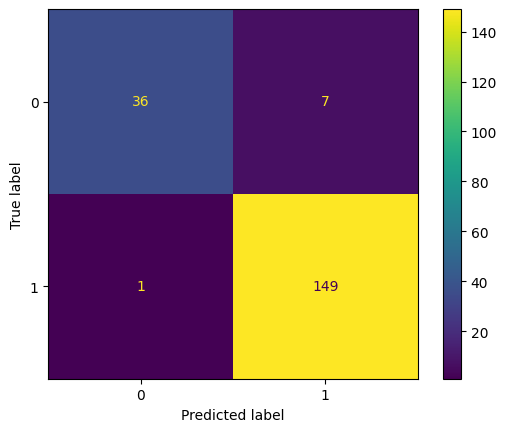

In [223]:
ConfusionMatrixDisplay.from_predictions( y_test, y_pred_test)